In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_columns', 50)

stud = pd.read_csv('stud_math.csv')

In [2]:
display(stud.head(13))
print(stud.nunique())
print(stud.info())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


school                  2
sex                     2
age                     8
address                 2
famsize                 2
Pstatus                 2
Medu                    5
Fedu                    6
Mjob                    5
Fjob                    5
reason                  4
guardian                3
traveltime              4
studytime               4
failures                4
schoolsup               2
famsup                  2
paid                    2
activities              2
nursery                 2
studytime, granular     4
higher                  2
internet                2
romantic                2
famrel                  6
freetime                5
goout                   5
health                  5
absences               36
score                  18
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0

In [3]:
# Выводы из первичного осмотра данных:

# 1) В данных достаточно много пропусков (максимум 45 в 'Pstatus') 
# и всего 3 столбца из 30 заполнены целиком ('school', 'sex', 'age').
# Часть пропусков следует заменить, иначе придётся удалять слишком много.

# 2) Из 13 столбцов с числовыми данными только 1 ('age') имеет формат int.
# Возможно, его стоит преобразовать в формат остальных столбцов float
# для удобства дальнешего анализа.

# 3) Столбец 'studytime, granular' очевидно взаимосвязан со 'studytime',
# т.к. их значения прямо пропорциональны. Следует проверить их корреляцию
# и удалить один из них.

In [4]:
stud.age = stud.age.astype('float')

In [5]:
stud['studytime, granular'].corr(stud['studytime'])

-0.9999999999999991

In [6]:
stud.drop(['studytime, granular'], inplace = True, axis = 1)

In [7]:
# В столбце 'address' 17 пропусков и всего 2 варианта значений,
# поэтому логично заполнить пропуски пропорционально имеющимся значениям
# (метод backfill при переборе дал наиболее похожее распределение).

stud.address = stud.address.fillna(method = 'backfill')
pd.DataFrame(stud.address.value_counts())

,address
U,306
R,89


In [8]:
# В датафрейме ещё 10 столбцов с двумя вариантами значений.
# Пропуски можно заполнить тем же способом:

for column in ['famsize','Pstatus','schoolsup','famsup','paid',
               'activities','nursery','higher','internet','romantic']:
    stud[column] = stud[column].fillna(method = 'backfill')

In [9]:
# В датафрейме 13 столбцов с ограниченным набором значений (3-6 вариантов)
# и достаточно большим количеством пропусков. Для них выбрано заполнение
# интерполяцией по методу pad, который выбирает из существующего набора:

for column in ['Medu','Fedu','Mjob','Fjob','reason','guardian',
               'traveltime','studytime','failures',
               'famrel','freetime','goout','health']:
    stud[column] = stud[column].interpolate(method='pad')

In [10]:
# В датафрейме осталось 2 столбца с пропусками: 'absences' и 'score'.

# 'Score' - это переменная, которую будет предсказывать будущая модель,
# поэтому пропуски следует не заменять, а удалить.

# В 'absences' самый большой разброс данных (36 вариантов) и их диапазон
# никак не ограничен, так что подстановка значений, скорее всего, будет
# не совсем корректной. При этом количество пропусков не большое, и, если
# удалить их вместе с пропусками 'score', получится не более 18 строк
# из 395, т.е. менее 5 % датасета, что нормально для очистки.

In [11]:
stud = stud[(pd.notnull(stud['absences'])) & (pd.notnull(stud['score']))]

In [12]:
# Итоговый датасет без пропусков.
print(stud.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      378 non-null    object 
 1   sex         378 non-null    object 
 2   age         378 non-null    float64
 3   address     378 non-null    object 
 4   famsize     378 non-null    object 
 5   Pstatus     378 non-null    object 
 6   Medu        378 non-null    float64
 7   Fedu        378 non-null    float64
 8   Mjob        378 non-null    object 
 9   Fjob        378 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    378 non-null    object 
 12  traveltime  378 non-null    float64
 13  studytime   378 non-null    float64
 14  failures    378 non-null    float64
 15  schoolsup   378 non-null    object 
 16  famsup      378 non-null    object 
 17  paid        378 non-null    object 
 18  activities  378 non-null    object 
 19  nursery     378 non-null    o

In [13]:
# Оценка распределения значений номинативных признаков:
for c in stud:
    if stud[c].dtype == object:
        display(pd.DataFrame(stud[c].value_counts()))

,school
GP,334
MS,44


,sex
F,201
M,177


,address
U,292
R,86


,famsize
GT3,270
LE3,108


,Pstatus
T,340
A,38


,Mjob
other,129
services,102
at_home,60
teacher,55
health,32


,Fjob
other,206
services,110
teacher,28
at_home,19
health,15


,reason
course,138
reputation,103
home,102
other,35


,guardian
mother,262
father,91
other,25


,schoolsup
no,326
yes,52


,famsup
yes,237
no,141


,paid
no,216
yes,162


,activities
yes,196
no,182


,nursery
yes,302
no,76


,higher
yes,360
no,18


,internet
yes,317
no,61


,romantic
no,247
yes,131


In [14]:
# Описание функции для проведения теста Стьюдента по номинативным признакам.

def student_test(col):
    cols = stud.loc[:, col].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, col] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, col] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', col)
            break

In [15]:
# Для номинативных признаков:
# проверка значимости каждого признака с помощью теста Стьюдента 
# с целью исключить незначимые из набора данных для модели:

for c in stud:
    if stud[c].dtype == object:
        student_test(c)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [16]:
# Описание функции для построения гистограмм по числовым столбцам.

def small_hist(col, tint):
    if stud[col].dtype != object:
        fig = plt.figure()
        axes = fig.add_axes([0, 0, 0.7, 0.4])
        axes.hist(stud[col], color = tint)
        axes.set_title(col)

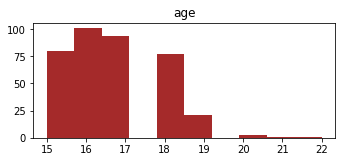

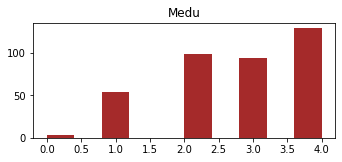

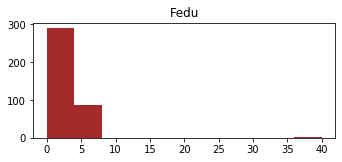

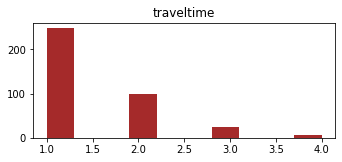

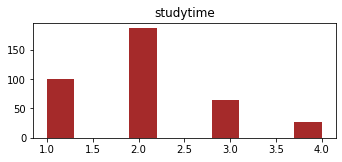

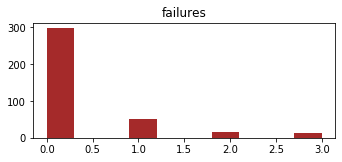

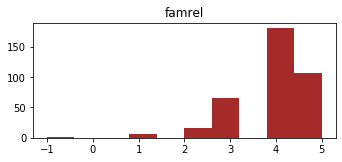

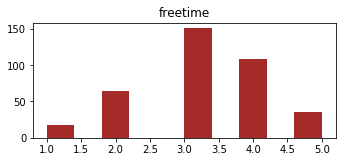

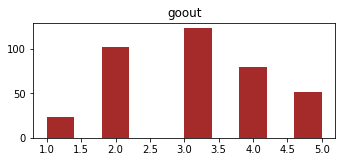

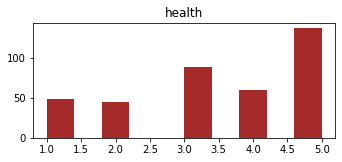

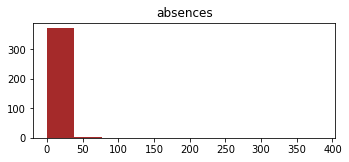

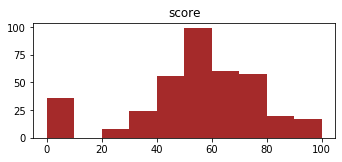

In [17]:
# Для числовых признаков:
# построение гистограммы распределения каждого признака
# с целью оценить наличие выбросов:

for c in stud:
    small_hist(c,'brown')

In [18]:
# Выводы по графикам:

# 1) В столбце 'Fedu' есть выброс, значение которого = '40.0'. 
# Очевидно, это опечатка и значение 40.0 следует заменить на '4.0'.

# 2) В столбце 'famrel' есть одно отрицательное значение.
# Вероятно, это тоже опечатка и '-1' здесь стоит заменить на '1'.

# 3) В столбце 'absences' присутствуют слишком большие значения,
# сильно отличающиеся от остальных. Определить, являются эти
# выбросы ошибочными или реальными данными, невозможно, т.к.
# неизвестен период, за который указано количество пропущенных
# занятий. Поэтому эти выбросы нужно удалить.

# 4) В данных столбца 'score' есть разрыв между значениями 0 и 20 
# баллов, что очень существенно для диапазона 100 баллов.
# Возможно, на экзамене не предполагается оценка ниже 20 баллов,
# а '0' - это данные тех, кто вообще не сдавал этот экзамен.
# В этом случае для модели, оценивающей успеваемость, эти
# строки стоит удалить.

In [19]:
# Описание функции для определения границ выбросов (методом IQR).

def out_point(col,n):
    q1 = stud[col].quantile(0.25)
    q3 = stud[col].quantile(0.75)
    if n==0:
        return 2.5*q1 - 1.5*q3
    elif n==1:
        return 2.5*q3 - 1.5*q1
    else:
        print('Не выбрана граница (0/1)')

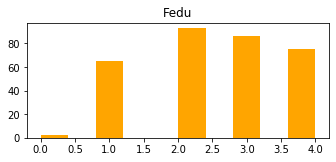

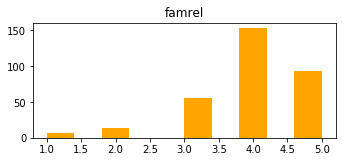

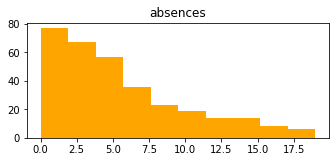

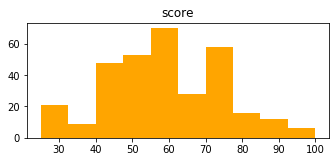

In [20]:
stud.Fedu = stud.Fedu.apply(lambda x: 4 if x == 40 else x)

stud.famrel = stud.famrel.apply(lambda x: 1 if x == -1 else x)

stud = stud[(stud['absences'] > out_point('absences',0)) & (stud['absences'] < out_point('absences',1))]

stud = stud[stud.score != 0]

for c in ['Fedu','famrel','absences','score']:
    small_hist(c,'orange')

In [21]:
# Итоговый датасет без пропусков и выбросов.
print(stud.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      321 non-null    object 
 1   sex         321 non-null    object 
 2   age         321 non-null    float64
 3   address     321 non-null    object 
 4   famsize     321 non-null    object 
 5   Pstatus     321 non-null    object 
 6   Medu        321 non-null    float64
 7   Fedu        321 non-null    float64
 8   Mjob        321 non-null    object 
 9   Fjob        321 non-null    object 
 10  reason      321 non-null    object 
 11  guardian    321 non-null    object 
 12  traveltime  321 non-null    float64
 13  studytime   321 non-null    float64
 14  failures    321 non-null    float64
 15  schoolsup   321 non-null    object 
 16  famsup      321 non-null    object 
 17  paid        321 non-null    object 
 18  activities  321 non-null    object 
 19  nursery     321 non-null    o

In [22]:
# Оценка корреляции между всеми числовыми параметрами:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.141673,-0.153667,0.094365,-0.002201,0.208877,0.081237,0.029449,0.142104,-0.044515,0.187928,-0.138069
Medu,-0.141673,1.000000,0.588649,-0.156122,0.086797,-0.213929,0.003941,0.031217,0.065607,-0.022626,0.061365,0.188540
Fedu,-0.153667,0.588649,1.000000,-0.145031,-0.028590,-0.288678,0.011776,-0.013743,-0.010780,0.066848,-0.017133,0.125460
traveltime,0.094365,-0.156122,-0.145031,1.000000,-0.070665,0.102094,-0.015530,0.026289,0.047070,-0.007947,-0.059608,-0.067860
studytime,-0.002201,0.086797,-0.028590,-0.070665,1.000000,-0.166120,0.066944,-0.136031,-0.022987,-0.072771,-0.085765,0.153408
failures,0.208877,-0.213929,-0.288678,0.102094,-0.166120,1.000000,-0.013669,0.083918,0.072489,0.044468,0.164359,-0.260033
famrel,0.081237,0.003941,0.011776,-0.015530,0.066944,-0.013669,1.000000,0.155456,0.040440,0.101266,-0.106462,0.083319
freetime,0.029449,0.031217,-0.013743,0.026289,-0.136031,0.083918,0.155456,1.000000,0.289671,0.045130,0.075245,-0.006204
goout,0.142104,0.065607,-0.010780,0.047070,-0.022987,0.072489,0.040440,0.289671,1.000000,0.006500,0.138991,-0.189258
health,-0.044515,-0.022626,0.066848,-0.007947,-0.072771,0.044468,0.101266,0.045130,0.006500,1.000000,-0.029857,-0.047385


In [23]:
# Итоговые выводы о качестве данных:
# В наборе данных было достаточно много пропусков, 
# но бОльшую часть из них удалось скорректировать.
# Кроме того, данные содержали небольшое количество
# ошибок, которые были исправлены, и выбросы, которые
# были удалены.
# После очистки данных для дальнейшего анализа 
# сохранилась бОльшая часть исходной выборки (81%).

In [24]:
# Промежуточные выводы о взаимосвязях и распределении данных 
# (без учёта влияния на 'score'):

# Почти все ученики из выборки учатся в одной и той же школе,
# живут в полных семьях и недалеко от школы, хотят получить
# высшее образвание и не имеют внеучебных неудач.

# Большинство учеников живут в городе в большой семье (опекун -
# мать), занимаются дополнительно в школе и дома, посещали 
# детский сад, имеют доступ в интернет, романтические отношения
# и не более 5 пропусков занятий.

# Сильной корреляции между признаками нет, наибольшая 59% -
# между уровнем образования обоих родителей (при этом у женщин,
# в среднем, образование выше) и 29% между свободным временем
# и общением с друзьями.

# Можно отметить, что с возрастом растёт количество внеучебных 
# неудач и пропусков уроков. У родителей с хорошим образованием
# жильё ближе к школе, а у их детей меньше внеучебных неудач.
# Также их меньше у тех, кто тратит больше времени 
# на внешкольную учёбу.

In [25]:
# Итоговые выводы по выборке столбцов:
# Для построения модели целесообразно оставить номинальные признаки,
# выбранные тестом Стьюдента ('address','Mjob','higher','romantic'),
# и числовые параметры, наиболее коррелирующие с величиной 'score' 
# ('Medu','failures','goout','absences').

In [26]:
stud_model = stud[['address','Mjob','higher','romantic','Medu','failures','goout','absences','score']]
display(stud_model.head(13))

,address,Mjob,higher,romantic,Medu,failures,goout,absences,score
0,U,at_home,yes,no,4.0,0.0,4.0,6.0,30.0
1,U,at_home,yes,no,1.0,0.0,3.0,4.0,30.0
2,U,at_home,yes,yes,1.0,3.0,2.0,10.0,50.0
3,U,health,yes,yes,4.0,0.0,2.0,2.0,75.0
4,U,other,yes,no,3.0,0.0,2.0,4.0,50.0
5,U,services,yes,no,4.0,0.0,2.0,10.0,75.0
6,U,other,yes,no,2.0,0.0,4.0,0.0,55.0
7,U,other,yes,no,4.0,0.0,4.0,6.0,30.0
8,U,services,yes,no,3.0,0.0,2.0,0.0,95.0
9,U,other,yes,no,3.0,0.0,1.0,0.0,75.0
